In [1]:
!pip install yfinance
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 2.1 MB/s eta 0:00:00


In [2]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def get_stonks(stock_code,days):
  end_date = pd.Timestamp.now()
  start_date = end_date - pd.Timedelta(days=days)
  return yf.download(stock_code, start=start_date, end=end_date)

In [4]:
def MACD(df, window_slow, window_fast, window_signal):
    macd = pd.DataFrame()
    macd['ema_slow'] = df['Close'].ewm(span=window_slow).mean()
    macd['ema_fast'] = df['Close'].ewm(span=window_fast).mean()
    macd['macd'] = macd['ema_slow'] - macd['ema_fast']
    macd['signal'] = macd['macd'].ewm(span=window_signal).mean()
    macd['diff'] = macd['macd'] - macd['signal']
    macd['bar_positive'] = macd['diff'].map(lambda x: x if x > 0 else 0)
    macd['bar_negative'] = macd['diff'].map(lambda x: x if x < 0 else 0)
    macd['hist'] = macd['macd'] - macd['signal']
    return macd



In [5]:
def implement_macd_strategy(macd,prices, data):    
    buy_price = []
    sell_price = []
    macd_signal = []
    signal = 0

    for i in range(len(data)):
        if macd['macd'][i] > macd['signal'][i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        elif macd['macd'][i] < macd['signal'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            macd_signal.append(0)
            
    return buy_price, sell_price, macd_signal


In [6]:
def make_macd(df,a,b,c,sc):
  macd = MACD(df, a, b, c)
  macd_plot  = [
    mpf.make_addplot((macd['macd']), color='#606060', panel=2, ylabel='MACD', secondary_y=False),
    mpf.make_addplot((macd['signal']), color='#1f77b4', panel=2, secondary_y=False),
    mpf.make_addplot((macd['bar_positive']), type='bar', color='#4dc790', panel=2),
    mpf.make_addplot((macd['bar_negative']), type='bar', color='#fd6b6c', panel=2),
  ]
  mpf.plot(df, type='candle', volume=True, addplot=macd_plot)
  buy_price, sell_price, macd_signal = implement_macd_strategy(macd,df['Close'], macd)
  ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
  ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)
  ax1.plot(df['Close'], color = 'skyblue', linewidth = 2, label = 'df')
  ax1.plot(df.index, buy_price, marker = '^', color = 'green', markersize = 10, label = 'BUY SIGNAL', linewidth = 0)
  ax1.plot(df.index, sell_price, marker = 'v', color = 'r', markersize = 10, label = 'SELL SIGNAL', linewidth = 0)
  ax1.legend()
  ax1.set_title(sc + ' MACD SIGNALS')
  ax2.plot(macd['macd'], color = 'grey', linewidth = 1.5, label = 'MACD')
  ax2.plot(macd['signal'], color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')
  for i in range(len(macd)):
    if str(macd['hist'][i])[0] == '-':
      ax2.bar(macd.index[i], macd['hist'][i], color = '#ef5350')
    else:
      ax2.bar(macd.index[i], macd['hist'][i], color = '#26a69a')
  plt.legend(loc = 'lower right')
  plt.show()


AAPL
[*********************100%***********************]  1 of 1 completed


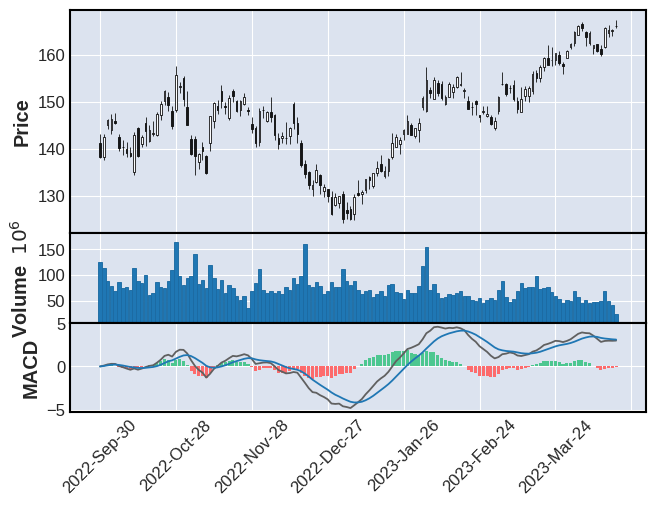

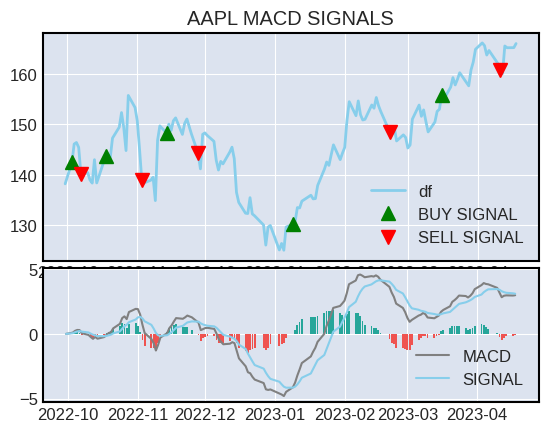

In [8]:
sc = input()
df = get_stonks(sc,200)
make_macd(df,12,26,9,sc)

### **EXTRA CODE**

In [ ]:
sc = 'AAPL'
df = get_stonks('MAANALU.NS',200)
#make_macd(df,12,26,9,sc)
macd = MACD(df, 12, 26, 9)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.index

DatetimeIndex(['2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08',
               '2022-09-09', '2022-09-12', '2022-09-13', '2022-09-14',
               '2022-09-15', '2022-09-16',
               ...
               '2023-03-10', '2023-03-13', '2023-03-14', '2023-03-15',
               '2023-03-16', '2023-03-17', '2023-03-20', '2023-03-21',
               '2023-03-22', '2023-03-23'],
              dtype='datetime64[ns]', name='Date', length=139, freq=None)

In [ ]:
macd

,ema_slow,ema_fast,macd,signal,diff,bar_positive,bar_negative,hist
Date,,,,,,,,
2022-09-05,154.949997,154.949997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-09-06,154.516662,154.534611,-0.017949,-0.009972,-0.007977,0.000000,-0.007977,-0.007977
2022-09-07,156.383601,156.246770,0.136831,0.050193,0.086638,0.086638,0.000000,0.086638
2022-09-08,164.075121,163.096802,0.978319,0.364599,0.613720,0.613720,0.000000,0.613720
2022-09-09,168.157329,166.808011,1.349317,0.657530,0.691787,0.691787,0.000000,0.691787
...,...,...,...,...,...,...,...,...
2023-03-17,192.816717,196.725439,-3.908722,-3.227017,-0.681705,0.000000,-0.681705,-0.681705
2023-03-20,191.583377,195.842048,-4.258672,-3.433348,-0.825324,0.000000,-0.825324,-0.825324
2023-03-21,190.724396,195.112989,-4.388593,-3.624397,-0.764196,0.000000,-0.764196,-0.764196


In [ ]:
macd_signal

[0,
 -1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
buy_price

[nan,
 155.9600067138672,
 nan,
 157.3699951171875,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 143.75,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 149.6999969482422,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 130.14999389648438,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 155.85000610351562,
 nan,
 nan,
 nan,
 nan,
 nan]